# Project 4

# Web scraping

In [194]:
URL = "https://www.indeed.com.sg/jobs?q=data&l=Singapore"

In [195]:
# Importing various packages 
import urllib
import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd
import re
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler #statsmodels api module
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score, cross_val_predict

sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [196]:
# Defining features we want to extract from the pages we scrape using Beautiful soup 
def parse(url):
    html = requests.get(url)
    soup = BeautifulSoup(html.content, 'html.parser', from_encoding="utf-8")
    df = pd.DataFrame(columns=["Title","Location","Company","Salary", "Synopsis"])
    for each in soup.find_all(class_= "result" ):
        try: 
            title = each.find(class_='jobtitle').text.replace('\n', '')
        except:
            title = 'None'
        try:
            location = each.find('span', {'class':"location" }).text.replace('\n', '')
        except:
            location = 'None'
        try: 
            company = each.find(class_='company').text.replace('\n', '')
        except:
            company = 'None'
        try:
            salary = each.find('span', {'class':'no-wrap'}).text
        except:
            salary = 'None'
        synopsis = each.find('span', {'class':'summary'}).text.replace('\n', '')
        df = df.append({'Title':title, 'Location':location, 'Company':company, 'Salary':salary, 'Synopsis':synopsis}, ignore_index=True)
    return df


In [197]:
# Running the function 
parse(URL)

,Title,Location,Company,Salary,Synopsis
0,Data Scientist,None,Accenture,None,As well as be expo...
1,Data Scientist,None,Amgen,None,Experience process...
2,Data Analyst,None,Wells Fargo,None,Support data gover...
3,Autonomous Vehicle Field Engineer,None,Moovita Pte Ltd,"\n $3,000 - $6,000 a month",Data analysis experience is a plus. Experience...
4,Machine Intelligence Technology Natural Langua...,Singapore,Alibaba,None,"Explore large scale data, research..."
5,Financial Analyst,Kallang,Dimension Data,None,Diversity in Dimension Data. The p...
6,FRM Analyst,Singapore,Cargill,None,"At the same time, this position ca..."
7,2018 Market Data Analyst - Singapore,Singapore,Bloomberg,None,"Our Market Data Analysts collect, ..."
8,"Officer, Operations Analyst Market Singapore",Singapore,Bank of America,None,Settlement instructions data feed....
9,KYC Analyst,Singapore,Crédit Agricole CIB,None,Input client's data and upload doc...


# Load dataset

In [198]:
# Loading dataset compliled from all members of the group
df = pd.read_csv('/Users/adhish/Downloads/combined4.csv')

# Cleaning the data 

In [199]:
df.head(20)

,job_title,job_description,salary,company,salary_min
0,"VP, Business Data Analyst, Enterprise Data Str...","VP, Business Data Analyst, Enterprise Data St...",6000,United Overseas Bank,5000
1,Data Architect,An exciting Data Architect role has just bec...,15000,Robert Walters (Singapore) Pte Ltd,13333
2,Data Analyst,Leading the way in International Banking. We...,4500,Standard Chartered Bank Singapore,4500
3,Data Architect,Leading the way in International Banking. We...,4500,Standard Chartered Bank Singapore,4500
4,Data Manager,"This role reports to the project lead, Retai...",4500,Standard Chartered Bank Singapore,4500
5,"Head, Big Data Engineering (Chief Data Office)",Leading the way in International Banking. We ...,4500,Standard Chartered Bank Singapore,4500
6,Data Analyst,2-3 years of experience in SQL. Knowledge of...,6000,Helius Technologies Pte Ltd,5000
7,"Data Lead, FCC Screening, Chief Data Office",Leading the way in International Banking. We ...,4500,Standard Chartered Bank Singapore,4500
8,Senior Data Analyst,Senior Data Analyst Deep dive into our data...,6000,OCBC Bank,5000
9,"Data Analyst, Group Data Management Office (1 ...","Data Analyst, Group Data Management Office (1...",6000,OCBC Bank,5000


In [200]:
df.shape

(1506, 5)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506 entries, 0 to 1505
Data columns (total 5 columns):
job_title          1506 non-null object
job_description    1506 non-null object
salary             1506 non-null object
company            1506 non-null object
salary_min         1506 non-null object
dtypes: object(5)
memory usage: 58.9+ KB


In [202]:
# Creating a summary of the data we have 
print df.get_dtype_counts()
print '----------------------------------'
print df.dtypes
print '----------------------------------'
print df.isnull().sum()
print '----------------------------------'
print df.index
print '----------------------------------'
print df.shape

object    5
dtype: int64
----------------------------------
job_title          object
job_description    object
salary             object
company            object
salary_min         object
dtype: object
----------------------------------
job_title          0
job_description    0
salary             0
company            0
salary_min         0
dtype: int64
----------------------------------
RangeIndex(start=0, stop=1506, step=1)
----------------------------------
(1506, 5)


In [203]:
print df.columns

Index([u'job_title', u'job_description', u'salary', u'company', u'salary_min'], dtype='object')


In [204]:
# Printing column names and what is contained in them 
for col in df.columns :
    print 'Column Name:' ,col
    print df[col].value_counts()
    print '-----------------------------------------------'

Column Name: job_title
Business Analyst                                                                                          294
Data Analyst                                                                                              224
Data Scientist                                                                                            166
Business Intelligence                                                                                      40
Data Engineer                                                                                              27
Data Entry Officer / Public Surveyor - JP                                                                   9
Scientist (Data Analytics)  /  I2R (A*STAR)                                                                 8
Senior Data Engineer                                                                                        6
Data Analyst Intern                                                                              

In [205]:
# Remove non_ascii characters
def remove_non_ascii(text):
    return ''.join(i for i in text if ord(i)<128)

df['job_title'] = df['job_title'].apply(remove_non_ascii)
df['job_description'] = df['job_description'].apply(remove_non_ascii)
df['company'] = df['company'].apply(remove_non_ascii)

In [206]:
# Combine text from job desc and job title and dump into one column
df['combined'] = df['job_description'] + df['job_title']

In [207]:
# Exploring salary column 
df['salary'].describe()

count              1506
unique              133
top       Not Specified
freq                359
Name: salary, dtype: object

In [208]:
# Looking at the salary column we see that there are 359 non specified values 
salary_sum = []
for i in df.salary.values:
    if i != 'Not Specified':
        salary_sum.append(float(i))

In [209]:
# Removing non specified rows
df = df[ (df['salary'] == 'Not Specified') == False ]

In [210]:
# Change the salary column type to float
df['salary'] = df['salary'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1147 entries, 0 to 1421
Data columns (total 6 columns):
job_title          1147 non-null object
job_description    1147 non-null object
salary             1147 non-null float64
company            1147 non-null object
salary_min         1147 non-null object
combined           1147 non-null object
dtypes: float64(1), object(5)
memory usage: 62.7+ KB


In [211]:
# Assigning x and y
X = df['combined']
y = df['salary']
# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

type(X_train)


(860,)
(287,)
(860,)
(287,)


pandas.core.series.Series

# Question 1


In [212]:
# Importing NLP toolkits 
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, CountVectorizer, TfidfVectorizer, HashingVectorizer
import nltk

In [213]:
# NLTK and sklearn both have their own stop words list 
nltk.download('stopwords')
nltk_stops = stopwords.words()
custom_stop_words = list(ENGLISH_STOP_WORDS)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adhish/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [214]:
# use default options for CountVectorizer
vect = CountVectorizer()

# create document-term matrices
Xs_train = vect.fit_transform(X_train)
Xs_test = vect.transform(X_test)
# Check the length of our data that is in a vectorized state
print('# of features: {}'.format( len(vect.get_feature_names()) ))
print 'Xs_train.shape', Xs_train.shape
print 'Xs_test.shape', Xs_test.shape

# of features: 12788
Xs_train.shape (860, 12788)
Xs_test.shape (287, 12788)


In [215]:
# Looking into Xs_train
Xs_train

<860x12788 sparse matrix of type '<type 'numpy.int64'>'
	with 151044 stored elements in Compressed Sparse Row format>

In [216]:
# to see what's inside, re-do this and put into a df.
# Transforming our x_train data using fit cvec.
# converting the result to a DataFrame.
Xs_train = pd.DataFrame(vect.transform(df['combined']).todense(),
                       columns=vect.get_feature_names())

Xs_train.head()

,00,000,0000974,000gw,000interested,000location,000work,000z,00am,00pm,...,zi,zkclient,zone,zones,zookeeper,zoomdata,zoomdatacomfortable,zrich,zurich,zycus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [217]:
# Which words appear the most?
word_counts = Xs_train.sum(axis=0)
word_counts.sort_values(ascending = False).head(20)

and           20910
to            10915
the            8630
in             7981
of             7865
data           7350
with           5515
for            3871
business       3543
experience     3146
or             2936
on             2292
as             2236
is             1922
will           1840
be             1832
you            1733
management     1659
team           1581
work           1547
dtype: int64

# NLP Stop word removal 

In [218]:
# Appending to the list of stop words to be removed 
from sklearn.feature_extraction import text 
new_words = ['work', 'new', 'ensure', 'team', 'provide', 'including' , 'experience', 'skills', 'data', 'knowledge',
            'ability', 'strong', 'years', 'management', 'business', 'working', 'good', 'degree', 'communication',
            'excellent', 'able', 'science', 'computer', 'time', 'development', 'environment', 'related', 
            'understanding', 'relevant', 'requirements', 'minimum', 'tools', 'systems',
            'information', 'preferred', 'learning', 'design', 'written',              
            'project', 'plus', 'candidates', 'using', 'required', 'research', 'com', 'industry', 'interpersonal',
            'solutions', 'problems', 'advantage', 'apply', 'solving'             
            'level', 'high', 'player']
custom_stop_words.extend(new_words)
stop_words = text.ENGLISH_STOP_WORDS.union(custom_stop_words)
type(stop_words)

frozenset

In [104]:
# remove English stop words
vect = CountVectorizer(stop_words=stop_words, ngram_range=(1,2),lowercase=True)
Xs_train = vect.fit_transform(X_train)
Xs_test = vect.transform(X_test)

Xs_train = pd.DataFrame(vect.transform(df['combined']).todense(),
                       columns=vect.get_feature_names())

word_counts = Xs_train.sum(axis=0)
word_counts.sort_values(ascending = False).head

<bound method Series.head of analytics                       1333
support                         1174
analysis                        1131
analyst                         1069
technology                       854
develop                          709
machine                          697
process                          674
technical                        665
software                         609
projects                         608
financial                        591
engineering                      576
job                              575
teams                            556
responsibilities                 546
quality                          542
analytical                       538
role                             533
performance                      516
sql                              515
big                              507
models                           505
processes                        500
application                      495
stakeholders                     474
user     

In [219]:
print Xs_train.shape
print Xs_test.shape
print y_train.shape
print y_test.shape

(1147, 12788)
(287, 12788)
(860,)
(287,)


In [220]:
type(X_train)
# X_train

pandas.core.series.Series

In [221]:
# Feature extraction with CountVectorizer and then running linear regression 
vect = CountVectorizer(stop_words=stop_words, ngram_range=(1, 2),lowercase=True)
Xs_train = vect.fit_transform(X_train)
Xs_test = vect.transform(X_test)

lr = LinearRegression()
lr.fit(Xs_train, y_train)
lr.score(Xs_test, y_test)

0.27271712161084793

In [222]:
# Feature extraction with TfidfVectorizer- Word Importance 
tfidfvect = TfidfVectorizer(stop_words=stop_words, ngram_range = (1,2))
Xs_train = tfidfvect.fit_transform(X_train)
Xs_test = tfidfvect.transform(X_test)

Xs_train = pd.DataFrame(tfidfvect.transform(df['combined']).todense(),
                       columns=tfidfvect.get_feature_names())

word_counts = Xs_train.sum(axis=0)
word_counts.sort_values(ascending = False)

analytics                        25.620234
analysis                         19.810054
analyst                          19.190771
support                          18.940224
machine                          16.005504
technology                       14.915798
financial                        13.907141
develop                          13.663456
process                          13.529984
technical                        13.453252
job                              12.955239
projects                         12.816066
software                         12.721886
engineering                      12.640953
user                             12.468954
big                              12.423926
application                      11.800022
analytical                       11.767923
models                           11.567116
quality                          11.416888
stakeholders                     11.400912
reporting                        11.378697
performance                      11.143322
insights   

In [223]:
# Running linear regression
Xs_train = tfidfvect.fit_transform(X_train)
lr = LinearRegression()
lr.fit(Xs_train, y_train)
lr.score(Xs_test, y_test)

0.34187732591897035

In [224]:
# Feature extraction using Hashing Vectorizer 
hashvec = HashingVectorizer(stop_words=stop_words, non_negative=True, ngram_range = (1,2))
Xs_train = hashvec.fit_transform(X_train)
Xs_test = hashvec.transform(X_test)

# Running regression
lr = LinearRegression()
lr.fit(Xs_train, y_train)
lr.score(Xs_test, y_test)
# TFIDF score is the best 

/anaconda2/lib/python2.7/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


0.2832262654799035

In [225]:
# Importing various packages 
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [119]:
lr = LinearRegression()
lr_lasso = Lasso(random_state=0, alpha=500) # alpha 0 to 1
lr_ridge = Ridge(alpha=100)   # alpha 0 to 1
elast = ElasticNet(alpha=0.1, l1_ratio=0.1)   # alpha 0 to 1
svr = SVR(kernel='linear')  # almost the same as poly
dtr = DecisionTreeRegressor(random_state=0)
rfr = RandomForestRegressor(n_estimators = 10, random_state = 0) # number of trees 10. Pick random.
gradboost_reg = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1) # default n_estimators=100, learning_rate=0.1

lr.fit(Xs_train, y_train)
lr_lasso.fit(Xs_train, y_train)
lr_ridge.fit(Xs_train, y_train)
elast.fit(Xs_train, y_train)
svr.fit(Xs_train, y_train)
dtr.fit(Xs_train, y_train)
rfr.fit(Xs_train, y_train)
gradboost_reg.fit(Xs_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [120]:
print 'Cross_val_score :'
print 'LinearRegression          : ', cross_val_score(lr, Xs_train, y_train, cv=3, n_jobs=-1).mean()
print 'Lasso                     : ', cross_val_score(lr_lasso, Xs_train, y_train, cv=3, n_jobs=-1).mean()
print 'Ridge                     : ', cross_val_score(lr_ridge, Xs_train, y_train, cv=3, n_jobs=-1).mean()
print 'ElasticNet                : ', cross_val_score(elast, Xs_train, y_train, cv=3, n_jobs=-1).mean()
print 'SVR                       : ', cross_val_score(svr, Xs_train, y_train, cv=3, n_jobs=-1).mean()
print 'DecisionTreeRegressor     : ', cross_val_score(dtr, Xs_train, y_train, cv=3, n_jobs=-1).mean()
print 'RandomForestRegressor     : ', cross_val_score(rfr, Xs_train, y_train, cv=3, n_jobs=-1).mean()
print "GradientBoostingRegressor : ", cross_val_score(gradboost_reg, Xs_train, y_train, cv=3, n_jobs=-1).mean()

Cross_val_score :
LinearRegression          :  0.3578032054994185
Lasso                     :  -0.004494235397973038
Ridge                     :  0.022514941745027477
ElasticNet                :  0.044104750216047615
SVR                       :  -0.07463398250448423
DecisionTreeRegressor     :  -0.00480257463902245
RandomForestRegressor     :  0.35528614766563815
GradientBoostingRegressor :  0.35781931821032703


In [121]:
print 'Accuracy score :'
print 'LinearRegression          : ', lr.score(Xs_test, y_test)
print 'RandomForestRegressor     : ', rfr.score(Xs_test, y_test)
print "GradientBoostingRegressor : ", gradboost_reg.score(Xs_test, y_test)

Accuracy score :
LinearRegression          :  0.2832262654799035
RandomForestRegressor     :  0.26566677572429886
GradientBoostingRegressor :  0.2648470207144563


In [112]:
# Bagging regressor.
lr = LinearRegression()
from sklearn.ensemble import BaggingRegressor
lr_bagger = BaggingRegressor(lr)
print "lr Bagging Score            : ", cross_val_score(lr_bagger, Xs_train, y_train, cv=10, n_jobs=-1).mean()

lr Bagging Score            :  0.37759816777131155


# Classification

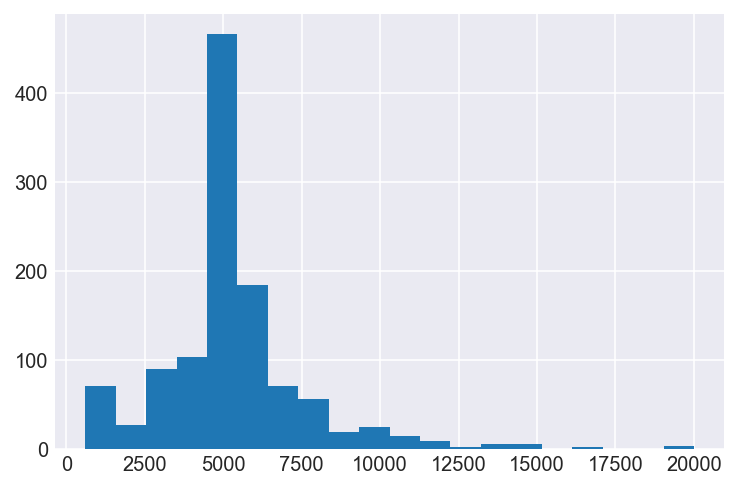

In [226]:
# Plotting salary
df['salary'].hist(bins=20)

In [227]:
# Seeing the distribution
df['salary'].describe()

count     1147.000000
mean      5119.971229
std       2340.427409
min        600.000000
25%       4375.000000
50%       4500.000000
75%       6000.000000
max      20000.000000
Name: salary, dtype: float64

In [228]:
# Creating classes for salaries 
(df['salary'] >= 2000) & (df['salary'] < 5000)

0       False
1       False
2        True
3        True
4        True
5        True
6       False
7        True
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22       True
24      False
25      False
26      False
27      False
28      False
29      False
30      False
        ...  
1235     True
1236     True
1237     True
1238     True
1239    False
1240    False
1241     True
1242     True
1243     True
1244     True
1245    False
1246    False
1247     True
1248     True
1249     True
1250     True
1251    False
1252    False
1254     True
1267     True
1280     True
1283     True
1289     True
1290     True
1330     True
1339    False
1353    False
1379    False
1392     True
1421    False
Name: salary, Length: 1147, dtype: bool

In [230]:
# Binning the salary into classes and make sure it is balanced. (But they're not!)
df.loc[(df['salary'] >= 0) & (df['salary'] < 4376) , 'Pay_class'] = 1
df.loc[(df['salary'] >= 4376) & (df['salary'] < 4501) , 'Pay_class'] = 2
df.loc[(df['salary'] >= 4501) & (df['salary'] < 6701) , 'Pay_class'] = 3
df.loc[(df['salary'] >= 6701) , 'Pay_class'] = 4
df['Pay_class']= df['Pay_class'].fillna(0.0).astype(int)  # Turn y into int
df['Pay_class'].value_counts()

2    347
3    335
1    287
4    178
Name: Pay_class, dtype: int64

In [231]:
# Getting a pay_prediction mean
df.loc[df['Pay_class'] == 1, 'Pay_pred_mean'] =  (0.0 + 4500)/2
df.loc[df['Pay_class'] == 2, 'Pay_pred_mean'] = (4500 + 4501)/2
df.loc[df['Pay_class'] == 3, 'Pay_pred_mean'] = (4501 + 5500)/2
df.loc[df['Pay_class'] == 4, 'Pay_pred_mean'] = (5500 + 20000)/2
df

,job_title,job_description,salary,company,salary_min,combined,Pay_class,Pay_pred_mean
0,"VP, Business Data Analyst, Enterprise Data Str...","VP, Business Data Analyst, Enterprise Data St...",6000.0,United Overseas Bank,5000,"VP, Business Data Analyst, Enterprise Data St...",3,5000.0
1,Data Architect,An exciting Data Architect role has just bec...,15000.0,Robert Walters (Singapore) Pte Ltd,13333,An exciting Data Architect role has just bec...,4,12750.0
2,Data Analyst,Leading the way in International Banking. We...,4500.0,Standard Chartered Bank Singapore,4500,Leading the way in International Banking. We...,2,4500.0
3,Data Architect,Leading the way in International Banking. We...,4500.0,Standard Chartered Bank Singapore,4500,Leading the way in International Banking. We...,2,4500.0
4,Data Manager,"This role reports to the project lead, Retai...",4500.0,Standard Chartered Bank Singapore,4500,"This role reports to the project lead, Retai...",2,4500.0
5,"Head, Big Data Engineering (Chief Data Office)",Leading the way in International Banking. We ...,4500.0,Standard Chartered Bank Singapore,4500,Leading the way in International Banking. We ...,2,4500.0
6,Data Analyst,2-3 years of experience in SQL. Knowledge of...,6000.0,Helius Technologies Pte Ltd,5000,2-3 years of experience in SQL. Knowledge of...,3,5000.0
7,"Data Lead, FCC Screening, Chief Data Office",Leading the way in International Banking. We ...,4500.0,Standard Chartered Bank Singapore,4500,Leading the way in International Banking. We ...,2,4500.0
8,Senior Data Analyst,Senior Data Analyst Deep dive into our data...,6000.0,OCBC Bank,5000,Senior Data Analyst Deep dive into our data...,3,5000.0
9,"Data Analyst, Group Data Management Office (1 ...","Data Analyst, Group Data Management Office (1...",6000.0,OCBC Bank,5000,"Data Analyst, Group Data Management Office (1...",3,5000.0


In [234]:
X_cat = df['combined']
y_cat = df['Pay_class']

# split the new DataFrame into training and testing sets
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_cat, y_cat, test_size=0.25, random_state=1)

print Xc_train.shape
print Xc_test.shape
print yc_train.shape
print yc_test.shape

(860,)
(287,)
(860,)
(287,)


In [235]:
#CountVectorizer with Log_regression
cvec_sn12 = CountVectorizer(stop_words=stop_words, ngram_range=(1, 2),lowercase=True)
X_cvec_sn12_train = cvec_sn12.fit_transform(Xc_train)
X_cvec_sn12_test = cvec_sn12.transform(Xc_test)

from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state = 0)
logr.fit(X_cvec_sn12_train, yc_train)
print 'logr.score with X_cvec_sn12' , logr.score(X_cvec_sn12_test, yc_test)

yc_pred = logr.predict(X_cvec_sn12_test)

from sklearn.metrics import classification_report
print(classification_report(yc_test, yc_pred))

logr.score with X_cvec_sn12 0.5818815331010453
             precision    recall  f1-score   support

          1       0.71      0.70      0.70        76
          2       0.54      0.58      0.56        86
          3       0.54      0.58      0.56        77
          4       0.51      0.40      0.45        48

avg / total       0.58      0.58      0.58       287



In [236]:
#CountVectorizer with decision tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=None)
dtc.fit(X_cvec_sn12_train, yc_train)
print 'dtc.score with X_cvec_sn12' , dtc.score(X_cvec_sn12_test, yc_test)

ydtc_pred = dtc.predict(X_cvec_sn12_test)

from sklearn.metrics import classification_report
print(classification_report(yc_test, ydtc_pred))

dtc.score with X_cvec_sn12 0.49477351916376305
             precision    recall  f1-score   support

          1       0.53      0.59      0.56        76
          2       0.48      0.49      0.48        86
          3       0.45      0.51      0.48        77
          4       0.57      0.33      0.42        48

avg / total       0.50      0.49      0.49       287



In [237]:
#CountVectorizer with naive_bayes MultinomialNB
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_cvec_sn12_train, yc_train)
print 'MultinomialNB .score with X_cvec_sn12: ' , nb.score(X_cvec_sn12_test, yc_test)

ynb_pred = nb.predict(X_cvec_sn12_test)


from sklearn.metrics import classification_report
print(classification_report(yc_test, ynb_pred))

MultinomialNB .score with X_cvec_sn12:  0.5574912891986062
             precision    recall  f1-score   support

          1       0.84      0.49      0.62        76
          2       0.66      0.56      0.60        86
          3       0.42      0.82      0.56        77
          4       0.57      0.25      0.35        48

avg / total       0.63      0.56      0.55       287



In [238]:
# TfidfVectorizer with LogisticRegression with Stop word and n-gram1,2.
tfidfvect = TfidfVectorizer(stop_words=stop_words, ngram_range=(1, 2))
X_tfidfvect_train = tfidfvect.fit_transform(Xc_train)
X_tfidfvect_test = tfidfvect.transform(Xc_test)

from sklearn.linear_model import LogisticRegression
logr2 = LogisticRegression(random_state = 0)
logr2.fit(X_tfidfvect_train, yc_train)
print 'logr2.score with tfidfvect sn12: ' , logr2.score(X_tfidfvect_test, yc_test)

ylogr2_pred = logr2.predict(X_tfidfvect_test)


from sklearn.metrics import classification_report
print(classification_report(yc_test, ylogr2_pred))


logr2.score with tfidfvect sn12:  0.5609756097560976
             precision    recall  f1-score   support

          1       0.83      0.53      0.65        76
          2       0.57      0.60      0.58        86
          3       0.45      0.79      0.58        77
          4       0.67      0.17      0.27        48

avg / total       0.62      0.56      0.54       287



In [239]:
#HashingVectorizer
hashvec = HashingVectorizer(stop_words=stop_words, non_negative=True, ngram_range=(1, 2))
Xhvec_train = hashvec.fit_transform(Xc_train)
Xhvec_test = hashvec.transform(Xc_test)

from sklearn.linear_model import LogisticRegression
logr3 = LogisticRegression(random_state = 0)
logr3.fit(Xhvec_train, yc_train)

print 'logr3.score with hashvec with stop' , logr3.score(Xhvec_test, yc_test)

ylogr3_pred = logr3.predict(Xhvec_test)


from sklearn.metrics import classification_report
print(classification_report(yc_test, ylogr3_pred))

/anaconda2/lib/python2.7/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


logr3.score with hashvec with stop 0.5505226480836237
             precision    recall  f1-score   support

          1       0.71      0.58      0.64        76
          2       0.51      0.62      0.56        86
          3       0.49      0.66      0.56        77
          4       0.59      0.21      0.31        48

avg / total       0.57      0.55      0.54       287



In [240]:
#TfidfVectorizer with GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier  
gbc = GradientBoostingClassifier(n_estimators=10)
gbc.fit(X_tfidfvect_train, yc_train)

print 'gbc.score with tfidfvect' , gbc.score(X_tfidfvect_test, yc_test)

ygbc_pred = gbc.predict(X_tfidfvect_test)

from sklearn.metrics import classification_report
print(classification_report(yc_test, ygbc_pred))

gbc.score with tfidfvect 0.4912891986062718
             precision    recall  f1-score   support

          1       0.73      0.43      0.55        76
          2       0.48      0.56      0.51        86
          3       0.38      0.48      0.42        77
          4       0.53      0.48      0.51        48

avg / total       0.53      0.49      0.50       287



In [241]:
df['combined'].head()

0     VP, Business Data Analyst, Enterprise Data St...
1      An exciting Data Architect role has just bec...
2      Leading the way in International Banking. We...
3      Leading the way in International Banking. We...
4      This role reports to the project lead, Retai...
Name: combined, dtype: object

In [242]:
pd.DataFrame( logr2.coef_, columns=tfidfvect.get_feature_names())

,00,00 00,00 000,00 000z,00 18,00 19,00 200,00 300,00 500,00 day,...,zoomdata,zoomdata comfortable,zoomdatacomfortable,zoomdatacomfortable large,zrich,zrich singapore,zurich,zurich san,zycus,zycus proper
0,-0.011011,-0.000921,-0.028593,0.018941,-0.012670,-0.012641,0.059848,-0.019919,0.044823,-0.019919,...,-0.010593,-0.010593,-0.010846,-0.010846,-0.008053,-0.008053,-0.005882,-0.005882,-0.016287,-0.016287
1,-0.205852,-0.018468,0.018039,-0.007112,-0.015590,-0.012648,-0.029706,-0.012481,-0.017808,-0.012481,...,-0.019853,-0.019853,0.043401,0.043401,-0.008158,-0.008158,-0.007774,-0.007774,0.038590,0.038590
2,0.298066,0.028418,0.033640,-0.007727,0.035201,-0.016279,-0.020504,0.037875,-0.019063,0.037875,...,0.042222,0.042222,-0.021746,-0.021746,0.027114,0.027114,-0.009592,-0.009592,-0.016123,-0.016123
3,-0.078246,-0.008977,-0.022478,-0.003706,-0.006915,0.044552,-0.009385,-0.005818,-0.007645,-0.005818,...,-0.011104,-0.011104,-0.010183,-0.010183,-0.010497,-0.010497,0.024669,0.024669,-0.007502,-0.007502


In [243]:
# logr.coef_
docs = pd.DataFrame( abs(logr2.coef_),
                    columns=tfidfvect.get_feature_names()).sum()
    
docs.sort_values(ascending=False).head(30)

intern          3.427304
amp             2.774500
deep            2.050450
software        1.810624
roles           1.772958
application     1.713615
marketing       1.708207
technologies    1.639292
insights        1.618408
teams           1.596864
hadoop          1.591449
big             1.581584
media           1.580259
support         1.572243
sales           1.566030
build           1.549530
technology      1.531853
models          1.524417
global          1.515139
number          1.450571
engineer        1.448179
hr              1.436197
risk            1.387303
spark           1.364434
successful      1.342427
process         1.323472
english         1.317514
banking         1.300067
regional        1.298069
institute       1.286468
dtype: float64

# Question 2 

In [244]:
df['combined'].head()

0     VP, Business Data Analyst, Enterprise Data St...
1      An exciting Data Architect role has just bec...
2      Leading the way in International Banking. We...
3      Leading the way in International Banking. We...
4      This role reports to the project lead, Retai...
Name: combined, dtype: object

In [245]:
# removing puncuations and lower text
import string 
import re
df['combined'] = df['combined'].map(lambda x: re.sub('[^ a-zA-Z0-9]', '', x).lower())
df['combined'].values

array([' vp business data analyst enterprise data strategy data management office    the data management office dmo  is a business function that covers enterprise data governance data management big data analytics and enterprise data strategy data management office ensures that uob meets all data governance standards set by data regulators and optimize data management and usage to help uob make smarter faster and more accurate decisions and to improve operational efficiency    job description    the senior business data analyst is the primary liaison between the business and it responsibilities include leading business users it project teams and external partners to drive decision making and define requirements for application development ensuring that business needs are being met defining and negotiating project scope creating documentation of business requirements which guide application development efforts working closely with the business team development team and quality assurance

In [246]:
df['combined'].head()

0     vp business data analyst enterprise data stra...
1      an exciting data architect role has just bec...
2      leading the way in international banking we ...
3      leading the way in international banking we ...
4      this role reports to the project lead retail...
Name: combined, dtype: object

('Vocabulary: ', [u'00 onwards', u'10 000', u'11 00', u'12 months', u'2000 training', u'29th june', u'7k jurong', u'8k 8k', u'account assistant', u'account coordinator', u'account executive', u'account manager', u'account serving', u'accounting change', u'accounting data', u'accounting policies', u'acquisition recruiter', u'active directory', u'actuarial manager', u'admin assistant', u'admin officer', u'adobe photoshop', u'advance analytics', u'advanced adversary', u'advanced software', u'adversary team', u'ai data', u'ai engineer', u'ai scientist', u'air sea', u'aladdin business', u'aladdin client', u'algorithm data', u'alt sat', u'aml analyst', u'analyst 7k', u'analyst 8k', u'analyst alt', u'analyst apac', u'analyst associate', u'analyst big', u'analyst contract', u'analyst corporate', u'analyst crypto', u'analyst cyber', u'analyst data', u'analyst developer', u'analyst digital', u'analyst eds', u'analyst enterprise', u'analyst fca', u'analyst finance', u'analyst financial', u'analys

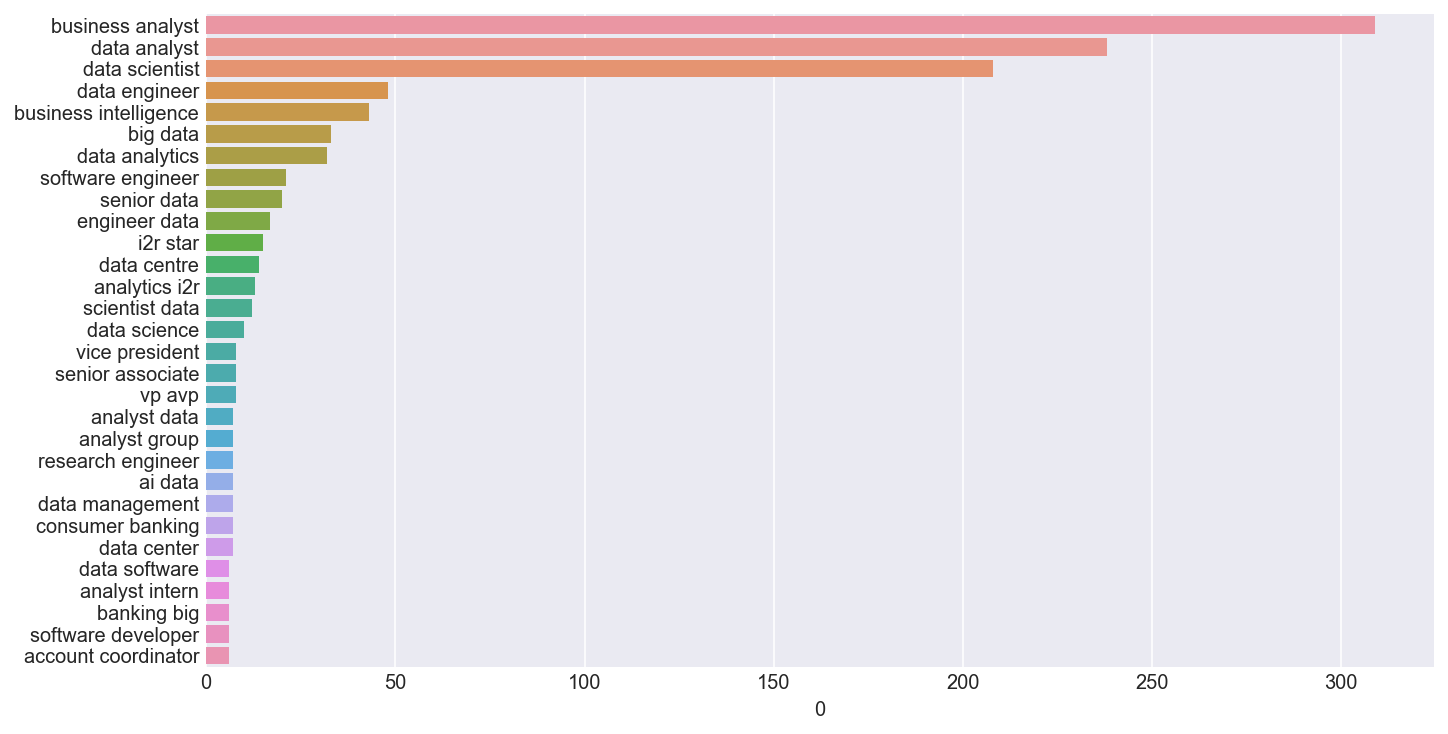

In [250]:
vect = CountVectorizer(stop_words='english', ngram_range=(2, 2))
vect.fit_transform(df.job_title)
print('Vocabulary: ', vect.get_feature_names())

# dataframe for countvectoriser
title_df = pd.DataFrame(vect.fit_transform(df.job_title).todense(),
                        columns=vect.get_feature_names())

# print out top 30 words
plot = title_df.sum(axis=0).sort_values(ascending = False).head(30)
plot = pd.DataFrame(plot)
fig, ax = plt.subplots(figsize=(11,6))
g = sns.barplot(plot[0], plot.index)
sns.despine()
plt.show()

In [251]:
# categorise target variable into broader categories 

jobs_categories = df['job_title'].apply(lambda x: 1 if 'business analyst' in x or 'business intelligence' in x 
                                      else 2 if 'engineer' in x or 'developer' in x
                                      else 3 if 'data science' in x or 'data scientist' in x or 'scientist' in x
                                      else 4 if 'data analyst' in x or 'analyst' in x
                                      else 0)

In [252]:
jobs_categories

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
       ..
1235    0
1236    0
1237    0
1238    0
1239    0
1240    0
1241    0
1242    0
1243    0
1244    0
1245    0
1246    0
1247    0
1248    0
1249    0
1250    0
1251    0
1252    0
1254    0
1267    0
1280    0
1283    0
1289    0
1290    0
1330    0
1339    0
1353    0
1379    0
1392    0
1421    0
Name: job_title, Length: 1147, dtype: int64

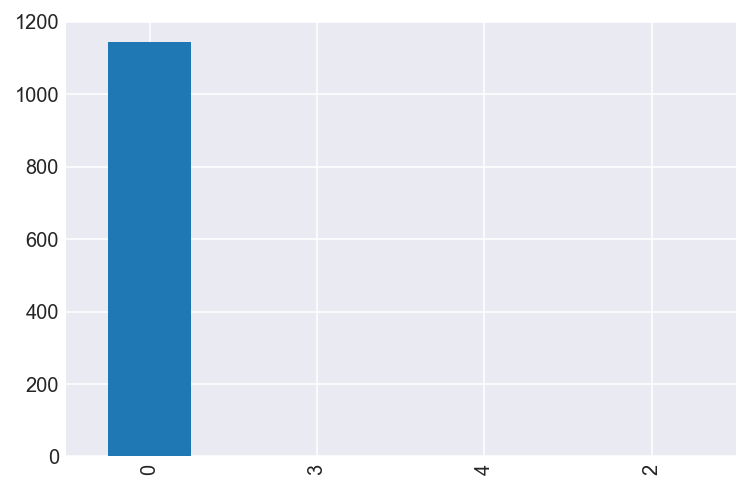

In [253]:
# Not much succeess with categorising the target variable
jobs_categories.value_counts().plot(kind='bar')

In [183]:
# Trying a different approach than above 

# Creating target variable y. All 'data' jobs are 1, rest are 0.
df[df.job_title.str.contains(pat='Data')]

,job_title,job_description,salary,company,salary_min,combined,Pay_class,Pay_pred_mean,DS
0,"VP, Business Data Analyst, Enterprise Data Str...","VP, Business Data Analyst, Enterprise Data St...",6000.0,United Overseas Bank,5000,vp business data analyst enterprise data stra...,4,12750.0,1
1,Data Architect,An exciting Data Architect role has just bec...,15000.0,Robert Walters (Singapore) Pte Ltd,13333,an exciting data architect role has just bec...,4,12750.0,1
2,Data Analyst,Leading the way in International Banking. We...,4500.0,Standard Chartered Bank Singapore,4500,leading the way in international banking we ...,2,4500.0,1
3,Data Architect,Leading the way in International Banking. We...,4500.0,Standard Chartered Bank Singapore,4500,leading the way in international banking we ...,2,4500.0,1
4,Data Manager,"This role reports to the project lead, Retai...",4500.0,Standard Chartered Bank Singapore,4500,this role reports to the project lead retail...,2,4500.0,1
5,"Head, Big Data Engineering (Chief Data Office)",Leading the way in International Banking. We ...,4500.0,Standard Chartered Bank Singapore,4500,leading the way in international banking we s...,2,4500.0,1
6,Data Analyst,2-3 years of experience in SQL. Knowledge of...,6000.0,Helius Technologies Pte Ltd,5000,23 years of experience in sql knowledge of s...,4,12750.0,1
7,"Data Lead, FCC Screening, Chief Data Office",Leading the way in International Banking. We ...,4500.0,Standard Chartered Bank Singapore,4500,leading the way in international banking we s...,2,4500.0,1
8,Senior Data Analyst,Senior Data Analyst Deep dive into our data...,6000.0,OCBC Bank,5000,senior data analyst deep dive into our data...,4,12750.0,1
9,"Data Analyst, Group Data Management Office (1 ...","Data Analyst, Group Data Management Office (1...",6000.0,OCBC Bank,5000,data analyst group data management office 1 y...,4,12750.0,1


In [185]:
df[df.job_title.str.contains(pat='Data')].shape

(629, 9)

In [186]:
X_ds = df['combined']
y_ds = df['DS']

print y_ds.shape
print X_ds.shape

(1147,)
(1147,)


In [187]:
#CountVectorizer with Log_regression
vectds = CountVectorizer(stop_words=stop_words, ngram_range=(1, 2),lowercase=True)
X_ds_vec = vectds.fit_transform(X_ds)
# Xds_test_vec = vectds.transform(Xds_test)

In [188]:
Xds_train, Xds_test, yds_train, yds_test = train_test_split(X_ds_vec, y_ds, test_size=0.25, random_state=1)

In [190]:
# Running logistic regression
from sklearn.linear_model import LogisticRegression
logr4 = LogisticRegression(random_state = 0)
logr4.fit(Xds_train, yds_train)
logr4.score(Xds_test, yds_test)
y_pred = logr4.predict(Xds_test)

In [191]:
from sklearn.metrics import classification_report
print(classification_report(yds_test, y_pred))

             precision    recall  f1-score   support

          0       0.84      0.82      0.83       137
          1       0.84      0.86      0.85       150

avg / total       0.84      0.84      0.84       287



# Executive Summary 

The utimate goal is to predict the annual salary based on the available features. In order to get the target y, I had to prepare for it first, as the scrapped salaries are joined together in a single string on a monthly basis. 

Once the target is properly defined, we focus on train set feature X. Since it is a prediction of numbers, my first attempt is to use regression. However,the X features are all in text. So it is time to use the new skill learn from the course, yes, NLP.

The first thing we learn is to tokenize the text. What it means is to separate the text into units such as sentences or words. Then the words need to be encoded as integers or floating point values for use as input to a machine learning algorithm. We call this process feature extraction, also known as vectorization. This is when NLTL package comes in. NLTK feature extraction module comes with 3 very common vectorizer.

1) CountVectorizer: to convert text to word count vectors . 2) TfidfVectorizer : to convert text to word frequency vectors. 3) HashingVectorizer : to convert text to unique integers.

Each have it's own stop word ability. Stop word is a list of words which its meaning has no effect to the meaning of the context. These words are stored in a list, and the vectorizer is smart enough to remove them.

Next feature that the vectorizer have is ngram. I put 1 to 2 settings. This is telling the vectorizer to put maximum 2 words together then do the counting on it as a whole. Of course I could have put 3 or 4, not only that the score drops, the 3 words combined don't make any sense. For example ngram=4, "research capabilities shared sensor".

Now with stop words, ngram applied to all 3 vectorizor, the regresion score appears to be terrible. 

I did run back and forth changing the param and adding new stop words, but without any improvement. I have even tried to apply ALL the regression I know, example lasso, ridge, decisiontree, support vector, random forest, gridient boost and bagging. None of them gives any good score.

That is when I realized, it could be due to regression's assumption. For regression to work, the relationship between independent and depentent varible must be linear. I did not check this and jump into regression is a grave mistake. But a good one.

So I tried classification technique. Same thing, we need to prepare y target. I binned the salary into 4 bins, according to the distribution, so that all class is balanced.

After y target is defined, and apply it to countvectorizer cum lemmatized words, stop word, ngram 1,2, into logistic regression, decisiontress, and multinomial navie bayes. The score highest achieved is only 0.48 from tfid logistic regression.



As for Question 2, we are supposed to find the Factors that distinguish job category. However, I hit into a serious problem with the first method used. Running logistic regression with the second method, I found some success. 